# Cynthia's Playground 2




## Setup

### Package Installing

In [2]:
!pip install spotipy

### Google Drive & Path

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import sys
PROJECT_ROOT = '/content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/'
sys.path.append(PROJECT_ROOT)

### Internal Imports

In [4]:
from SpotifyConnection import get_spotify_connection
import Playlist as PL
from DataProcessing import normalize_dataframe, SpotifyTracksDataset, normalize_data_by_type, normalize_data, NormalizationType

In [5]:
sp = get_spotify_connection()

### PyTorch/Numpy/Pandas

In [7]:
import numpy as np
import pandas as pd
import random

pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [9]:
def seed_torch(seed=0):
  random.seed(seed)

  np.random.seed(seed)
  np.random.RandomState(seed)

  torch.manual_seed(seed) 
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed) #seed all gpus    
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.enabled = False  
  torch.backends.cudnn.benchmark = False

seed_torch(0)

## Loading Data

### Load into DataFrame

Load the feature data from playlist into a dataframe

1.   Audio Features
2.   Track Info
3.   Artist Info
4.   Calculated Info
5.   Genres
6.   Target

In [10]:
#playlist_name = "2sRZldX6n9oaII70OoO3zB"
playlist_name = "4wVOVUOLCGhkwcehwpju6V"
#playlist_name = "EdSheeran"

pl = PL.load_playlist(PROJECT_ROOT + "playlist_" + playlist_name)
# pl_2 = PL.load_playlist(PROJECT_ROOT + "playlist_" + playlist_name_2)
# pl_3 = PL.load_playlist(PROJECT_ROOT + "playlist_" + playlist_name_3)

Loaded playlist from file: /content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/playlist_4wVOVUOLCGhkwcehwpju6V


In [11]:
playlist_name2 = "2sRZldX6n9oaII70OoO3zB"
pl2 = PL.load_playlist(PROJECT_ROOT + "playlist_" + playlist_name2)

Loaded playlist from file: /content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/playlist_2sRZldX6n9oaII70OoO3zB


In [28]:
playlist_name3 = "EdSheeran"
pl3 = PL.load_playlist(PROJECT_ROOT + "playlist_" + playlist_name3)

Loaded playlist from file: /content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/playlist_EdSheeran


In [53]:

playlist_info_df = pd.DataFrame()

''' Audio Features '''
playlist_info_df['key'] = pd.Series([x['key'] for x in pl.playlist_information.track_features.values])
playlist_info_df['mode'] = pd.Series([x['mode'] for x in pl.playlist_information.track_features.values])
playlist_info_df['time_signature'] = pd.Series([x['time_signature'] for x in pl.playlist_information.track_features.values])
playlist_info_df['duration'] = pd.Series([x['duration_ms'] / 1000 for x in pl.playlist_information.track_features.values])
playlist_info_df['acousticness'] = pd.Series([x['acousticness'] for x in pl.playlist_information.track_features.values])
playlist_info_df['danceability'] = pd.Series([x['danceability'] for x in pl.playlist_information.track_features.values])
playlist_info_df['energy'] = pd.Series([x['energy'] for x in pl.playlist_information.track_features.values])
playlist_info_df['instrumentalness'] = pd.Series([x['instrumentalness'] for x in pl.playlist_information.track_features.values])
playlist_info_df['liveness'] = pd.Series([x['liveness'] for x in pl.playlist_information.track_features.values])
playlist_info_df['loudness'] = pd.Series([x['loudness'] for x in pl.playlist_information.track_features.values])
playlist_info_df['speechiness'] = pd.Series([x['speechiness'] for x in pl.playlist_information.track_features.values])
playlist_info_df['valence'] = pd.Series([x['valence'] for x in pl.playlist_information.track_features.values])
playlist_info_df['tempo'] = pd.Series([x['tempo'] for x in pl.playlist_information.track_features.values])

''' Track Info '''
playlist_info_df['explicit'] = pd.Series([x['explicit'] for x in pl.playlist_information.track_info.values])
playlist_info_df['release_date'] = pd.Series([x['album']['release_date'] for x in pl.playlist_information.track_info.values])

''' Artist Info '''
playlist_info_df['artist_followers'] = pd.Series([np.array([x['followers']['total'] for x in y]).max() for y in pl.playlist_information.artists_info.values])
playlist_info_df['max_artist_popularity'] = pd.Series([np.array([x['popularity'] for x in y]).max() for y in pl.playlist_information.artists_info.values])
playlist_info_df['avg_popularity_artist_top_tracks'] = pl.artist_top_track_information_df['avg_popularity_artist_top_tracks']
playlist_info_df['avg_duration_artist_top_tracks'] = pl.artist_top_track_information_df['avg_duration_artist_top_tracks']
playlist_info_df['avg_acousticness_artist_top_tracks'] = pl.artist_top_track_information_df['avg_acousticness_artist_top_tracks']
playlist_info_df['avg_danceability_artist_top_tracks'] = pl.artist_top_track_information_df['avg_danceability_artist_top_tracks']
playlist_info_df['avg_energy_artist_top_tracks'] = pl.artist_top_track_information_df['avg_energy_artist_top_tracks']
playlist_info_df['avg_instrumentalness_artist_top_tracks'] = pl.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks']
playlist_info_df['avg_liveness_artist_top_tracks'] = pl.artist_top_track_information_df['avg_liveness_artist_top_tracks']
playlist_info_df['avg_loudness_artist_top_tracks'] = pl.artist_top_track_information_df['avg_loudness_artist_top_tracks']
playlist_info_df['avg_speechiness_artist_top_tracks'] = pl.artist_top_track_information_df['avg_speechiness_artist_top_tracks']
playlist_info_df['avg_valence_artist_top_tracks'] = pl.artist_top_track_information_df['avg_valence_artist_top_tracks']
playlist_info_df['avg_tempo_artist_top_tracks'] = pl.artist_top_track_information_df['avg_tempo_artist_top_tracks']

''' Calculated Info '''
playlist_info_df['change_from_avg_duration_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_duration_artist_top_tracks'] - playlist_info_df.duration).abs()
playlist_info_df['change_from_avg_acousticness_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_acousticness_artist_top_tracks'] - playlist_info_df.acousticness).abs()
playlist_info_df['change_from_avg_danceability_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_danceability_artist_top_tracks'] - playlist_info_df.danceability).abs()
playlist_info_df['change_from_avg_energy_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_energy_artist_top_tracks'] - playlist_info_df.energy).abs()
playlist_info_df['change_from_avg_instrumentalness_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks'] - playlist_info_df.instrumentalness).abs()
playlist_info_df['change_from_avg_liveness_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_liveness_artist_top_tracks'] - playlist_info_df.liveness).abs()
playlist_info_df['change_from_avg_loudness_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_loudness_artist_top_tracks'] - playlist_info_df.loudness).abs()
playlist_info_df['change_from_avg_speechiness_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_speechiness_artist_top_tracks'] - playlist_info_df.speechiness).abs()
playlist_info_df['change_from_avg_valence_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_valence_artist_top_tracks'] - playlist_info_df.valence).abs()
playlist_info_df['change_from_avg_tempo_artist_top_tracks'] = (pl.artist_top_track_information_df['avg_tempo_artist_top_tracks'] - playlist_info_df.tempo).abs()

''' Genres '''
genres_df = pl.genres_df

''' Target '''
playlist_info_df['popularity'] = pd.Series([x['popularity'] for x in pl.playlist_information.track_info.values])


In [13]:

playlist_info_df2 = pd.DataFrame()

''' Audio Features '''
playlist_info_df2['key'] = pd.Series([x['key'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['mode'] = pd.Series([x['mode'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['time_signature'] = pd.Series([x['time_signature'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['duration'] = pd.Series([x['duration_ms'] / 1000 for x in pl2.playlist_information.track_features.values])
playlist_info_df2['acousticness'] = pd.Series([x['acousticness'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['danceability'] = pd.Series([x['danceability'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['energy'] = pd.Series([x['energy'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['instrumentalness'] = pd.Series([x['instrumentalness'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['liveness'] = pd.Series([x['liveness'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['loudness'] = pd.Series([x['loudness'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['speechiness'] = pd.Series([x['speechiness'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['valence'] = pd.Series([x['valence'] for x in pl2.playlist_information.track_features.values])
playlist_info_df2['tempo'] = pd.Series([x['tempo'] for x in pl2.playlist_information.track_features.values])

''' Track Info '''
playlist_info_df2['explicit'] = pd.Series([x['explicit'] for x in pl2.playlist_information.track_info.values])
playlist_info_df2['release_date'] = pd.Series([x['album']['release_date'] for x in pl2.playlist_information.track_info.values])

''' Artist Info '''
playlist_info_df2['artist_followers'] = pd.Series([np.array([x['followers']['total'] for x in y]).max() for y in pl2.playlist_information.artists_info.values])
playlist_info_df2['max_artist_popularity'] = pd.Series([np.array([x['popularity'] for x in y]).max() for y in pl2.playlist_information.artists_info.values])
playlist_info_df2['avg_popularity_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_popularity_artist_top_tracks']
playlist_info_df2['avg_duration_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_duration_artist_top_tracks']
playlist_info_df2['avg_acousticness_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_acousticness_artist_top_tracks']
playlist_info_df2['avg_danceability_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_danceability_artist_top_tracks']
playlist_info_df2['avg_energy_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_energy_artist_top_tracks']
playlist_info_df2['avg_instrumentalness_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks']
playlist_info_df2['avg_liveness_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_liveness_artist_top_tracks']
playlist_info_df2['avg_loudness_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_loudness_artist_top_tracks']
playlist_info_df2['avg_speechiness_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_speechiness_artist_top_tracks']
playlist_info_df2['avg_valence_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_valence_artist_top_tracks']
playlist_info_df2['avg_tempo_artist_top_tracks'] = pl2.artist_top_track_information_df['avg_tempo_artist_top_tracks']

''' Calculated Info '''
playlist_info_df2['change_from_avg_duration_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_duration_artist_top_tracks'] - playlist_info_df2.duration).abs()
playlist_info_df2['change_from_avg_acousticness_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_acousticness_artist_top_tracks'] - playlist_info_df2.acousticness).abs()
playlist_info_df2['change_from_avg_danceability_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_danceability_artist_top_tracks'] - playlist_info_df2.danceability).abs()
playlist_info_df2['change_from_avg_energy_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_energy_artist_top_tracks'] - playlist_info_df2.energy).abs()
playlist_info_df2['change_from_avg_instrumentalness_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks'] - playlist_info_df2.instrumentalness).abs()
playlist_info_df2['change_from_avg_liveness_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_liveness_artist_top_tracks'] - playlist_info_df2.liveness).abs()
playlist_info_df2['change_from_avg_loudness_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_loudness_artist_top_tracks'] - playlist_info_df2.loudness).abs()
playlist_info_df2['change_from_avg_speechiness_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_speechiness_artist_top_tracks'] - playlist_info_df2.speechiness).abs()
playlist_info_df2['change_from_avg_valence_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_valence_artist_top_tracks'] - playlist_info_df2.valence).abs()
playlist_info_df2['change_from_avg_tempo_artist_top_tracks'] = (pl2.artist_top_track_information_df['avg_tempo_artist_top_tracks'] - playlist_info_df2.tempo).abs()

''' Genres '''
genres_df2 = pl2.genres_df

''' Target '''
playlist_info_df2['popularity'] = pd.Series([x['popularity'] for x in pl2.playlist_information.track_info.values])


In [29]:
playlist_info_df3 = pd.DataFrame()

''' Audio Features '''
playlist_info_df3['key'] = pd.Series([x['key'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['mode'] = pd.Series([x['mode'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['time_signature'] = pd.Series([x['time_signature'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['duration'] = pd.Series([x['duration_ms'] / 1000 for x in pl3.playlist_information.track_features.values])
playlist_info_df3['acousticness'] = pd.Series([x['acousticness'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['danceability'] = pd.Series([x['danceability'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['energy'] = pd.Series([x['energy'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['instrumentalness'] = pd.Series([x['instrumentalness'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['liveness'] = pd.Series([x['liveness'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['loudness'] = pd.Series([x['loudness'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['speechiness'] = pd.Series([x['speechiness'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['valence'] = pd.Series([x['valence'] for x in pl3.playlist_information.track_features.values])
playlist_info_df3['tempo'] = pd.Series([x['tempo'] for x in pl3.playlist_information.track_features.values])

''' Track Info '''
playlist_info_df3['explicit'] = pd.Series([x['explicit'] for x in pl3.playlist_information.track_info.values])
playlist_info_df3['release_date'] = pd.Series([x['album']['release_date'] for x in pl3.playlist_information.track_info.values])

''' Artist Info '''
playlist_info_df3['artist_followers'] = pd.Series([np.array([x['followers']['total'] for x in y]).max() for y in pl3.playlist_information.artists_info.values])
playlist_info_df3['max_artist_popularity'] = pd.Series([np.array([x['popularity'] for x in y]).max() for y in pl3.playlist_information.artists_info.values])
playlist_info_df3['avg_popularity_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_popularity_artist_top_tracks']
playlist_info_df3['avg_duration_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_duration_artist_top_tracks']
playlist_info_df3['avg_acousticness_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_acousticness_artist_top_tracks']
playlist_info_df3['avg_danceability_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_danceability_artist_top_tracks']
playlist_info_df3['avg_energy_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_energy_artist_top_tracks']
playlist_info_df3['avg_instrumentalness_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks']
playlist_info_df3['avg_liveness_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_liveness_artist_top_tracks']
playlist_info_df3['avg_loudness_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_loudness_artist_top_tracks']
playlist_info_df3['avg_speechiness_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_speechiness_artist_top_tracks']
playlist_info_df3['avg_valence_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_valence_artist_top_tracks']
playlist_info_df3['avg_tempo_artist_top_tracks'] = pl3.artist_top_track_information_df['avg_tempo_artist_top_tracks']

''' Calculated Info '''
playlist_info_df3['change_from_avg_duration_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_duration_artist_top_tracks'] - playlist_info_df3.duration).abs()
playlist_info_df3['change_from_avg_acousticness_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_acousticness_artist_top_tracks'] - playlist_info_df3.acousticness).abs()
playlist_info_df3['change_from_avg_danceability_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_danceability_artist_top_tracks'] - playlist_info_df3.danceability).abs()
playlist_info_df3['change_from_avg_energy_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_energy_artist_top_tracks'] - playlist_info_df3.energy).abs()
playlist_info_df3['change_from_avg_instrumentalness_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_instrumentalness_artist_top_tracks'] - playlist_info_df3.instrumentalness).abs()
playlist_info_df3['change_from_avg_liveness_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_liveness_artist_top_tracks'] - playlist_info_df3.liveness).abs()
playlist_info_df3['change_from_avg_loudness_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_loudness_artist_top_tracks'] - playlist_info_df3.loudness).abs()
playlist_info_df3['change_from_avg_speechiness_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_speechiness_artist_top_tracks'] - playlist_info_df3.speechiness).abs()
playlist_info_df3['change_from_avg_valence_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_valence_artist_top_tracks'] - playlist_info_df3.valence).abs()
playlist_info_df3['change_from_avg_tempo_artist_top_tracks'] = (pl3.artist_top_track_information_df['avg_tempo_artist_top_tracks'] - playlist_info_df3.tempo).abs()

''' Genres '''
genres_df3 = pl3.genres_df

''' Target '''
playlist_info_df3['popularity'] = pd.Series([x['popularity'] for x in pl3.playlist_information.track_info.values])

### Information about data

In [14]:
print(f"Track Information Available:")
for col in list(playlist_info_df.columns):
  print(f"  - {col}")

Track Information Available:
  - key
  - mode
  - time_signature
  - duration
  - acousticness
  - danceability
  - energy
  - instrumentalness
  - liveness
  - loudness
  - speechiness
  - valence
  - tempo
  - explicit
  - release_date
  - artist_followers
  - max_artist_popularity
  - avg_popularity_artist_top_tracks
  - avg_duration_artist_top_tracks
  - avg_acousticness_artist_top_tracks
  - avg_danceability_artist_top_tracks
  - avg_energy_artist_top_tracks
  - avg_instrumentalness_artist_top_tracks
  - avg_liveness_artist_top_tracks
  - avg_loudness_artist_top_tracks
  - avg_speechiness_artist_top_tracks
  - avg_valence_artist_top_tracks
  - avg_tempo_artist_top_tracks
  - change_from_avg_duration_artist_top_tracks
  - change_from_avg_acousticness_artist_top_tracks
  - change_from_avg_danceability_artist_top_tracks
  - change_from_avg_energy_artist_top_tracks
  - change_from_avg_instrumentalness_artist_top_tracks
  - change_from_avg_liveness_artist_top_tracks
  - change_from_avg

In [15]:
print(f"Track Information Available:")
for col in list(playlist_info_df2.columns):
  print(f"  - {col}")

Track Information Available:
  - key
  - mode
  - time_signature
  - duration
  - acousticness
  - danceability
  - energy
  - instrumentalness
  - liveness
  - loudness
  - speechiness
  - valence
  - tempo
  - explicit
  - release_date
  - artist_followers
  - max_artist_popularity
  - avg_popularity_artist_top_tracks
  - avg_duration_artist_top_tracks
  - avg_acousticness_artist_top_tracks
  - avg_danceability_artist_top_tracks
  - avg_energy_artist_top_tracks
  - avg_instrumentalness_artist_top_tracks
  - avg_liveness_artist_top_tracks
  - avg_loudness_artist_top_tracks
  - avg_speechiness_artist_top_tracks
  - avg_valence_artist_top_tracks
  - avg_tempo_artist_top_tracks
  - change_from_avg_duration_artist_top_tracks
  - change_from_avg_acousticness_artist_top_tracks
  - change_from_avg_danceability_artist_top_tracks
  - change_from_avg_energy_artist_top_tracks
  - change_from_avg_instrumentalness_artist_top_tracks
  - change_from_avg_liveness_artist_top_tracks
  - change_from_avg

In [ ]:
for genre in list(genres_df.columns):
  print(f"  {genre[6:]}")

  atl hip hop
  deep talent show
  karaoke
  southern hip hop
  trap latino
  post-disco
  deep pop r&b
  pittsburgh rap
  ohio hip hop
  indie cafe pop
  country dawn
  psychedelic hip hop
  hollywood
  indietronica
  drill
  boy band
  smooth jazz
  uk alternative pop
  washington indie
  classic uk pop
  soul
  dark trap
  beatlesque
  oakland hip hop
  new jack swing
  big room
  conscious hip hop
  mexican pop
  scam rap
  art pop
  vapor pop
  alternative dance
  neo soul
  hard rock
  girl group
  contemporary vocal jazz
  indie soul
  indie rock
  puerto rican pop
  grunge
  boston hip hop
  rap dominicano
  dfw rap
  cincinnati rap
  modern folk rock
  reggaeton flow
  melodic rap
  zimdancehall
  worship
  europop
  folktronica
  canzone napoletana
  spiritual hip hop
  pop rock
  indie folk
  merseybeat
  classic rock
  shimmer pop
  west coast rap
  piano blues
  new rave
  art rock
  witch house
  a cappella
  alternative r&b
  wonky
  country
  new orleans rap
  crunk
  r

In [16]:
for genre in list(genres_df2.columns):
  print(f"  {genre[6:]}")

  london rap
  indie pop rap
  drill
  ska
  float house
  malaysian pop
  french pop
  thrash metal
  icelandic electronic
  italian pop
  afro dancehall
  electro
  nu disco
  mandolin
  indie garage rock
  reggae
  warm drone
  danish rock
  lovers rock
  afrobeat
  emo rap
  italo dance
  edm
  trap argentino
  deep southern trap
  spanish experimental
  west coast rap
  baile pop
  new york drill
  classic opm
  hmong pop
  deep chill
  boom bap
  house
  psychedelic rock
  neo-psychedelic
  contemporary country
  cyberpunk
  synth funk
  modular synth
  gospel
  seattle hip hop
  bebop
  atl trap
  soft rock
  melbourne bounce
  metropopolis
  old school thrash
  ska revival
  fluxwork
  big beat
  latin jazz
  aussietronica
  fourth world
  meme rap
  edmonton indie
  gangster rap
  scorecore
  post-punk
  uk dance
  nz pop
  early us punk
  trap soul
  chicago soul
  modern reggae
  rock drums
  pagode baiano
  kentucky hip hop
  baltimore hip hop
  pittsburgh indie
  reggaeton

## Cleaning Data


In [54]:
relevant_genres = ["pop", "hip hop", "rock", "rap"]
relevant_genres_df = pd.DataFrame(columns=["genres_"+x for x in relevant_genres])

for index, row in genres_df.iterrows():
  row_info = []
  for relevant_genre in relevant_genres:
    for genre in genres_df.columns:
      genre_found = False
      if (relevant_genre in genre) and (row[genre] == 1):
        row_info.append(1)
        genre_found = True
        break;
    if not genre_found:
      row_info.append(0)

  relevant_genres_df.loc[index] = row_info
relevant_genres_df = relevant_genres_df.astype(float)
relevant_genres_df.head()

,genres_pop,genres_hip hop,genres_rock,genres_rap
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0


In [19]:
relevant_genres2 = ["pop", "hip hop", "rock", "rap"]
relevant_genres_df2 = pd.DataFrame(columns=["genres_"+x for x in relevant_genres2])

for index, row in genres_df2.iterrows():
  row_info = []
  for relevant_genre2 in relevant_genres2:
    for genre in genres_df2.columns:
      genre_found = False
      if (relevant_genre2 in genre) and (row[genre] == 1):
        row_info.append(1)
        genre_found = True
        break;
    if not genre_found:
      row_info.append(0)

  relevant_genres_df2.loc[index] = row_info
relevant_genres_df2 = relevant_genres_df2.astype(float)
relevant_genres_df2.head()

,genres_pop,genres_hip hop,genres_rock,genres_rap
0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0


In [30]:
relevant_genres3 = ["pop", "hip hop", "rock", "rap"]
relevant_genres_df3 = pd.DataFrame(columns=["genres_"+x for x in relevant_genres3])

for index, row in genres_df3.iterrows():
  row_info = []
  for relevant_genre3 in relevant_genres3:
    for genre in genres_df3.columns:
      genre_found = False
      if (relevant_genre3 in genre) and (row[genre] == 1):
        row_info.append(1)
        genre_found = True
        break;
    if not genre_found:
      row_info.append(0)

  relevant_genres_df3.loc[index] = row_info
relevant_genres_df3 = relevant_genres_df3.astype(float)
relevant_genres_df3.head()

,genres_pop,genres_hip hop,genres_rock,genres_rap
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0


In [55]:
cleaned_df = playlist_info_df.copy()

''' Discrete''' 
cleaned_df.time_signature = normalize_data_by_type(cleaned_df.time_signature, NormalizationType.DEFAULT)
cleaned_df.key = normalize_data_by_type(cleaned_df.key, NormalizationType.DEFAULT)
cleaned_df.explicit = cleaned_df.explicit *1
cleaned_df.release_date = 2020 - pd.to_datetime(cleaned_df.release_date).dt.year
cleaned_df.release_date = normalize_data_by_type(cleaned_df.release_date, NormalizationType.DEFAULT)

''' Continuous'''
cleaned_df.duration = normalize_data_by_type(cleaned_df.duration, NormalizationType.STD_CLAMP)
cleaned_df.avg_duration_artist_top_tracks = normalize_data_by_type(cleaned_df.avg_duration_artist_top_tracks, NormalizationType.STD_CLAMP)
cleaned_df.change_from_avg_duration_artist_top_tracks = normalize_data(cleaned_df.change_from_avg_duration_artist_top_tracks, data_min=0, data_max=playlist_info_df.duration.max()-playlist_info_df.duration.min())

cleaned_df.tempo = normalize_data_by_type(cleaned_df.tempo,NormalizationType.DEFAULT)
cleaned_df.avg_tempo_artist_top_tracks = normalize_data(cleaned_df.avg_tempo_artist_top_tracks, data_min=playlist_info_df.tempo.min(), data_max=playlist_info_df.tempo.max())
cleaned_df.change_from_avg_tempo_artist_top_tracks = normalize_data(cleaned_df.change_from_avg_tempo_artist_top_tracks, data_min=0, data_max=playlist_info_df.tempo.max()-playlist_info_df.tempo.min())

cleaned_df.loudness = normalize_data_by_type(cleaned_df.loudness, NormalizationType.DEFAULT)
cleaned_df.avg_loudness_artist_top_tracks = normalize_data(cleaned_df.avg_loudness_artist_top_tracks, data_min=playlist_info_df.loudness.min(), data_max=playlist_info_df.loudness.max())
cleaned_df.change_from_avg_loudness_artist_top_tracks = normalize_data(cleaned_df.change_from_avg_loudness_artist_top_tracks, data_min=0, data_max=playlist_info_df.loudness.max()-playlist_info_df.loudness.min())

cleaned_df.artist_followers = normalize_data_by_type(cleaned_df.artist_followers, NormalizationType.DEFAULT)

cleaned_df.max_artist_popularity = normalize_data(cleaned_df.max_artist_popularity, data_min=0, data_max=100)
cleaned_df.avg_popularity_artist_top_tracks = normalize_data(cleaned_df.avg_popularity_artist_top_tracks, data_min=0, data_max=100)


''' Add genre data '''
cleaned_df = pd.concat([cleaned_df, relevant_genres_df], axis=1, sort=False)

''' Drop missing data '''
cleaned_df.dropna(inplace=True)
'''Drop data that has popularity score less than 10: for the "2sRZldX6n9oaII70OoO3zB" dataset'''
cleaned_df_drop10 = cleaned_df[~(cleaned_df['popularity'] <= 10)]

classification_df = cleaned_df.copy()
hit_cutoff = 70
classification_df['hit'] = (classification_df.popularity > hit_cutoff)*1
classification_df_with_popularity = classification_df.copy()
classification_df = classification_df.drop("popularity", axis=1)
classification_df

,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.090909,1.0,0.0,0.000000,0.7680,0.000,0.278,0.000000,0.6690,0.406386,0.0000,0.0000,0.000000,0.0,0.000000,0.435896,0.94,0.827000,0.566062,0.769700,0.564000,0.292900,0.102168,0.164050,0.680018,0.132820,0.217670,0.552982,0.218621,0.001700,0.564000,0.014900,0.102168,0.504950,0.273632,0.132820,0.217670,0.552982,1.0,0.0,0.0,0.0,0
1,0.636364,1.0,0.8,0.401988,0.3280,0.701,0.425,0.130000,0.1000,0.716542,0.3750,0.5620,0.613942,0.0,0.000000,0.435896,0.94,0.827000,0.566062,0.769700,0.564000,0.292900,0.102168,0.164050,0.680018,0.132820,0.217670,0.552982,0.026387,0.441700,0.137000,0.132100,0.027832,0.064050,0.036524,0.242180,0.344330,0.060960,1.0,0.0,0.0,0.0,1
2,0.818182,0.0,0.8,0.000000,0.1330,0.607,0.596,0.000000,0.1230,0.771070,0.3580,0.1490,0.351315,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.088003,0.029486,0.192900,0.096200,0.009995,0.112800,0.055432,0.193780,0.198670,0.131890,1.0,1.0,0.0,1.0,0
3,0.636364,1.0,0.8,0.716617,0.0164,0.912,0.412,0.013000,0.1040,0.800617,0.1240,0.4220,0.704151,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.021077,0.146086,0.112100,0.087800,0.003005,0.131800,0.025886,0.040220,0.074330,0.220946,1.0,1.0,0.0,1.0,1
4,0.090909,1.0,0.8,0.337488,0.0150,0.758,0.474,0.000000,0.1160,0.781830,0.1460,0.0541,0.345581,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.036062,0.147486,0.041900,0.025800,0.009995,0.119800,0.044672,0.018220,0.293570,0.137624,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,0.000000,1.0,0.8,0.000000,0.8670,0.815,0.284,0.001050,0.0987,0.830193,0.0427,0.4490,0.335236,0.0,0.000000,0.023908,0.74,0.613000,0.167888,0.249099,0.641450,0.658350,0.023109,0.141210,0.850081,0.073730,0.759550,0.617627,0.094872,0.617901,0.173550,0.374350,0.022059,0.042510,0.019889,0.031030,0.310550,0.282391,1.0,0.0,1.0,1.0,0
3257,0.818182,1.0,0.8,0.378281,0.4290,0.679,0.568,0.000000,0.2630,0.847787,0.0249,0.6010,0.377094,0.0,0.000000,0.023908,0.74,0.612000,0.556317,0.293440,0.594100,0.664800,0.008521,0.112090,0.848145,0.082830,0.715500,0.626389,0.029140,0.135560,0.084900,0.096800,0.008521,0.150910,0.000358,0.057930,0.114500,0.249295,1.0,0.0,1.0,0.0,0
3258,0.636364,1.0,0.8,0.789632,0.4310,0.487,0.586,0.000128,0.1280,0.850317,0.0781,0.5250,0.369188,0.0,0.000000,0.023908,0.74,0.589091,0.586117,0.271518,0.596364,0.686182,0.007748,0.112536,0.853664,0.089482,0.690909,0.616527,0.030350,0.159482,0.109364,0.100182,0.007620,0.015464,0.003347,0.011382,0.165909,0.247338,1.0,0.0,1.0,0.0,0
3259,0.090909,1.0,0.8,0.171481,0.7540,0.815,0.579,0.219000,0.1530,0.752108,0.0450,0.6070,0.536327,0.0,0.000000,0.023908,0.74,0.612000,0.556317

In [22]:
cleaned_df2 = playlist_info_df2.copy()

''' Discrete''' 
cleaned_df2.time_signature = normalize_data_by_type(cleaned_df2.time_signature, NormalizationType.DEFAULT)
cleaned_df2.key = normalize_data_by_type(cleaned_df2.key, NormalizationType.DEFAULT)
cleaned_df2.explicit = cleaned_df2.explicit *1
cleaned_df2.release_date = 2020 - pd.to_datetime(cleaned_df2.release_date).dt.year
cleaned_df2.release_date = normalize_data_by_type(cleaned_df2.release_date, NormalizationType.DEFAULT)

''' Continuous'''
cleaned_df2.duration = normalize_data_by_type(cleaned_df2.duration, NormalizationType.STD_CLAMP)
cleaned_df2.avg_duration_artist_top_tracks = normalize_data_by_type(cleaned_df2.avg_duration_artist_top_tracks, NormalizationType.STD_CLAMP)
cleaned_df2.change_from_avg_duration_artist_top_tracks = normalize_data(cleaned_df2.change_from_avg_duration_artist_top_tracks, data_min=0, data_max=playlist_info_df.duration.max()-playlist_info_df.duration.min())

cleaned_df2.tempo = normalize_data_by_type(cleaned_df2.tempo,NormalizationType.DEFAULT)
cleaned_df2.avg_tempo_artist_top_tracks = normalize_data(cleaned_df2.avg_tempo_artist_top_tracks, data_min=playlist_info_df.tempo.min(), data_max=playlist_info_df.tempo.max())
cleaned_df2.change_from_avg_tempo_artist_top_tracks = normalize_data(cleaned_df2.change_from_avg_tempo_artist_top_tracks, data_min=0, data_max=playlist_info_df.tempo.max()-playlist_info_df.tempo.min())

cleaned_df2.loudness = normalize_data_by_type(cleaned_df2.loudness, NormalizationType.DEFAULT)
cleaned_df2.avg_loudness_artist_top_tracks = normalize_data(cleaned_df2.avg_loudness_artist_top_tracks, data_min=playlist_info_df.loudness.min(), data_max=playlist_info_df.loudness.max())
cleaned_df2.change_from_avg_loudness_artist_top_tracks = normalize_data(cleaned_df2.change_from_avg_loudness_artist_top_tracks, data_min=0, data_max=playlist_info_df.loudness.max()-playlist_info_df.loudness.min())

cleaned_df2.artist_followers = normalize_data_by_type(cleaned_df2.artist_followers, NormalizationType.DEFAULT)

cleaned_df2.max_artist_popularity = normalize_data(cleaned_df2.max_artist_popularity, data_min=0, data_max=100)
cleaned_df2.avg_popularity_artist_top_tracks = normalize_data(cleaned_df2.avg_popularity_artist_top_tracks, data_min=0, data_max=100)


''' Add genre data '''
cleaned_df2 = pd.concat([cleaned_df2, relevant_genres_df2], axis=1, sort=False)

''' Drop missing data '''
cleaned_df2.dropna(inplace=True)
'''Drop data that has popularity score less than 10: for the "2sRZldX6n9oaII70OoO3zB" dataset'''
cleaned_df_drop10_2 = cleaned_df2[~(cleaned_df2['popularity'] <= 10)]

classification_df2 = cleaned_df2.copy()
hit_cutoff = 70
classification_df2['hit'] = (classification_df2.popularity > hit_cutoff)*1
classification_df_with_popularity2 = classification_df2.copy()
classification_df2 = classification_df2.drop("popularity", axis=1)
classification_df2

,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.000000,1,0.8,0.635763,0.11100,0.795,0.594,0.000000,0.1620,0.858757,0.0747,0.409,0.616788,1,0.047619,1.605351e-01,0.98,0.800000,0.311576,0.150215,0.710100,0.587650,1.172850e-05,0.142850,0.856745,0.120075,0.373495,0.562272,0.068395,0.039215,0.084900,0.006350,1.172850e-05,0.019150,0.001630,0.045375,0.035505,0.051097,1.0,0.0,0.0,1.0,1
1,0.909091,0,0.8,0.601990,0.34300,0.692,0.713,0.000000,0.1020,0.896666,0.3510,0.615,0.627561,1,0.047619,2.244457e-01,0.90,0.744500,0.371442,0.119855,0.711850,0.585050,3.547000e-05,0.128010,0.849676,0.141975,0.437300,0.530387,0.049030,0.223145,0.019850,0.127950,3.547000e-05,0.026010,0.055198,0.209025,0.177700,0.093696,1.0,1.0,0.0,1.0,0
2,0.727273,0,1.0,0.624907,0.24100,0.487,0.366,0.000000,0.1260,0.787748,0.0531,0.161,0.311547,1,0.047619,5.171743e-02,0.83,0.730000,0.385505,0.187790,0.689800,0.555200,2.198000e-05,0.136900,0.841316,0.116640,0.435300,0.537084,0.053237,0.053210,0.202800,0.189200,2.198000e-05,0.010900,0.079407,0.063540,0.274300,0.227265,1.0,0.0,0.0,1.0,1
3,0.727273,1,1.0,0.455990,0.12700,0.590,0.652,0.000000,0.0626,0.865515,0.3350,0.691,0.569657,1,0.047619,1.355689e-02,0.77,0.647500,0.271440,0.182235,0.686250,0.564300,3.294180e-04,0.195690,0.846187,0.167480,0.561750,0.545200,0.023933,0.055235,0.096250,0.087700,3.294180e-04,0.133090,0.017798,0.167520,0.129250,0.021300,1.0,0.0,0.0,1.0,0
4,0.090909,1,0.8,0.670688,0.03550,0.824,0.733,0.000000,0.3240,0.874820,0.0613,0.393,0.447603,1,0.079365,1.124784e-01,0.84,0.638000,0.509454,0.089953,0.793300,0.647350,3.162250e-05,0.211375,0.859062,0.207180,0.368450,0.487865,0.045981,0.054453,0.030700,0.085650,3.162250e-05,0.112625,0.017138,0.145880,0.024550,0.042743,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,0.818182,1,0.8,0.132951,0.00874,0.880,0.556,0.000000,0.2170,0.851135,0.3330,0.422,0.616834,1,0.015873,1.974876e-03,0.68,0.628333,0.053449,0.086357,0.863167,0.680333,2.333333e-07,0.181517,0.869031,0.278833,0.684667,0.573668,0.032133,0.077617,0.016833,0.124333,2.333333e-07,0.035483,0.023920,0.054167,0.262667,0.039747,0.0,0.0,0.0,0.0,1
5494,0.454545,1,0.8,0.281620,0.49900,0.715,0.361,0.000006,0.0865,0.663631,0.0840,0.486,0.777151,0,0.000000,2.126413e-07,0.04,0.120000,0.115023,0.499000,0.715000,0.361000,5.660000e-06,0.086500,0.598994,0.084000,0.486000,0.772843,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
5495,0.090909,0,0.6,0.198557,0.05430,0.604,0.637,0.000000,0.1680,0.840545,0.0361,0.537,0.639997,0,0.000000,1.030202e-03,0.67,0.602000,0.191391,0.301700,0.613000,0.461600,1.300000e-07,0.116910,0.800084,0.050260,0.383700,0.593918,0.036048,0.247400,0.009000,0.175400,1.300000e-07,0.051090,0.031126,0.014160,0.153300,0.042532,1.0,0.0,0.0,0.0,0
5496,0.090909,1,0.8,0.360026,0.02210,0.490,0.618,0.000004,0.2590,0.870832,0.10

In [31]:
cleaned_df3 = playlist_info_df3.copy()

''' Discrete''' 
cleaned_df3.time_signature = normalize_data_by_type(cleaned_df3.time_signature, NormalizationType.DEFAULT)
cleaned_df3.key = normalize_data_by_type(cleaned_df3.key, NormalizationType.DEFAULT)
cleaned_df3.explicit = cleaned_df3.explicit *1
cleaned_df3.release_date = 2020 - pd.to_datetime(cleaned_df3.release_date).dt.year
cleaned_df3.release_date = normalize_data_by_type(cleaned_df3.release_date, NormalizationType.DEFAULT)

''' Continuous'''
cleaned_df3.duration = normalize_data_by_type(cleaned_df3.duration, NormalizationType.STD_CLAMP)
cleaned_df3.avg_duration_artist_top_tracks = normalize_data_by_type(cleaned_df3.avg_duration_artist_top_tracks, NormalizationType.STD_CLAMP)
cleaned_df3.change_from_avg_duration_artist_top_tracks = normalize_data(cleaned_df3.change_from_avg_duration_artist_top_tracks, data_min=0, data_max=playlist_info_df.duration.max()-playlist_info_df.duration.min())

cleaned_df3.tempo = normalize_data_by_type(cleaned_df3.tempo,NormalizationType.DEFAULT)
cleaned_df3.avg_tempo_artist_top_tracks = normalize_data(cleaned_df3.avg_tempo_artist_top_tracks, data_min=playlist_info_df.tempo.min(), data_max=playlist_info_df.tempo.max())
cleaned_df3.change_from_avg_tempo_artist_top_tracks = normalize_data(cleaned_df3.change_from_avg_tempo_artist_top_tracks, data_min=0, data_max=playlist_info_df.tempo.max()-playlist_info_df.tempo.min())

cleaned_df3.loudness = normalize_data_by_type(cleaned_df3.loudness, NormalizationType.DEFAULT)
cleaned_df3.avg_loudness_artist_top_tracks = normalize_data(cleaned_df3.avg_loudness_artist_top_tracks, data_min=playlist_info_df.loudness.min(), data_max=playlist_info_df.loudness.max())
cleaned_df3.change_from_avg_loudness_artist_top_tracks = normalize_data(cleaned_df3.change_from_avg_loudness_artist_top_tracks, data_min=0, data_max=playlist_info_df.loudness.max()-playlist_info_df.loudness.min())

cleaned_df3.artist_followers = normalize_data_by_type(cleaned_df3.artist_followers, NormalizationType.DEFAULT)

cleaned_df3.max_artist_popularity = normalize_data(cleaned_df3.max_artist_popularity, data_min=0, data_max=100)
cleaned_df3.avg_popularity_artist_top_tracks = normalize_data(cleaned_df3.avg_popularity_artist_top_tracks, data_min=0, data_max=100)


''' Add genre data '''
cleaned_df3 = pd.concat([cleaned_df3, relevant_genres_df3], axis=1, sort=False)

''' Drop missing data '''
cleaned_df3.dropna(inplace=True)
'''Drop data that has popularity score less than 10: for the "2sRZldX6n9oaII70OoO3zB" dataset'''
cleaned_df_drop10_3 = cleaned_df3[~(cleaned_df2['popularity'] <= 10)]

classification_df3 = cleaned_df3.copy()
hit_cutoff = 70
classification_df3['hit'] = (classification_df3.popularity > hit_cutoff)*1
classification_df_with_popularity3 = classification_df3.copy()
classification_df3 = classification_df3.drop("popularity", axis=1)
classification_df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.727273,1,0.50,0.742437,0.1630,0.599,0.448,0.000,0.1060,0.792913,0.0232,0.168,0.272808,0,0.272727,1.000000,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.035629,0.118990,0.073100,0.148300,0.000048,0.027970,0.005688,0.048890,0.375600,0.020527,1.0,0.0,0.0,0.0,1
1,0.545455,1,0.75,0.396885,0.0912,0.798,0.675,0.000,0.0894,0.846465,0.0442,0.842,0.332089,0,0.090909,1.000000,0.95,0.800500,0.351353,0.311290,0.692750,0.570600,0.016596,0.156160,0.847231,0.096985,0.595350,0.513550,0.000374,0.220090,0.105250,0.104400,0.016596,0.066760,0.041590,0.052785,0.246650,0.050322,1.0,0.0,0.0,0.0,1
2,0.454545,0,0.75,0.221299,0.1240,0.640,0.648,0.000,0.0802,0.717030,0.1870,0.548,0.255013,0,0.090909,1.000000,0.94,0.794000,0.146144,0.281697,0.679200,0.586600,0.000434,0.132005,0.835344,0.101085,0.480100,0.475002,0.014814,0.157697,0.039200,0.061400,0.000434,0.051805,0.035862,0.085915,0.067900,0.052569,1.0,0.0,0.0,0.0,1
3,0.090909,0,0.75,0.506357,0.5810,0.825,0.652,0.000,0.0931,0.924749,0.0802,0.931,0.280765,0,0.272727,1.000000,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.004014,0.299010,0.152900,0.055700,0.000048,0.040870,0.085308,0.008110,0.387400,0.016315,1.0,0.0,0.0,0.0,1
4,0.818182,0,0.75,0.273784,0.1480,0.857,0.621,0.000,0.0865,0.790217,0.0825,0.668,0.298036,0,0.090909,1.000000,0.94,0.771667,0.377148,0.203158,0.730567,0.597067,0.000135,0.152183,0.860949,0.085937,0.491833,0.503729,0.017158,0.055158,0.126433,0.023933,0.000135,0.065683,0.010952,0.003437,0.176167,0.058525,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.909091,0,0.75,0.954381,0.7730,0.665,0.228,0.948,0.0754,0.519171,0.0633,0.139,0.769769,0,0.545455,0.000014,0.03,0.032500,1.000000,0.684000,0.658500,0.484250,0.262750,0.076575,0.814067,0.043975,0.586750,0.533344,0.028275,0.089000,0.006500,0.256250,0.685250,0.001175,0.151152,0.019325,0.447750,0.161543,0.0,0.0,0.0,0.0,0
336,0.727273,0,0.75,0.531104,0.5530,0.789,0.767,0.000,0.0559,0.871408,0.0391,0.923,0.487347,0,0.545455,0.000014,0.03,0.032500,1.000000,0.684000,0.658500,0.484250,0.262750,0.076575,0.814067,0.043975,0.586750,0.533344,0.028409,0.131000,0.130500,0.282750,0.262750,0.020675,0.091971,0.004875,0.336250,0.012060,0.0,0.0,0.0,0.0,0
337,0.727273,0,0.75,0.534182,0.5820,0.804,0.577,0.857,0.0611,0.806185,0.0524,0.911,0.487193,0,0.545455,0.000014,0.03,0.032500,1.000000,0.684000,0.658500,0.484250,0.262750,0.076575,0.814067,0.043975,0.586750,0.533344,0.027997,0.102000,0.145500,0.092750,0.594250,0.015475,0.046952,0.008425,0.324250,0.011979,0.0,0.0,0.0,0.0,0
338,0.909091,0,0.75,0.953348,0.8750,0.411,0.342,0.000,0.1360,0.746482,0.0331,0.338,0.113558,0,0.545455,0.000014,0.03,0.032500,1.000000,0.684000,0.658500,0.484250,0.262750,0.076575,0.814067,0.043975,0.5

In [23]:
#drop all non hit songs in classification df2 then concatinate with classification_df
only_hits = classification_df2[classification_df2.hit == 1]
only_hits

,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.000000,1,0.8,0.635763,0.11100,0.795,0.594,0.000000,0.1620,0.858757,0.0747,0.409,0.616788,1,0.047619,0.160535,0.98,0.800000,0.311576,0.150215,0.710100,0.587650,1.172850e-05,0.142850,0.856745,0.120075,0.373495,0.562272,0.068395,0.039215,0.084900,0.006350,1.172850e-05,0.019150,0.001630,0.045375,0.035505,0.051097,1.0,0.0,0.0,1.0,1
2,0.727273,0,1.0,0.624907,0.24100,0.487,0.366,0.000000,0.1260,0.787748,0.0531,0.161,0.311547,1,0.047619,0.051717,0.83,0.730000,0.385505,0.187790,0.689800,0.555200,2.198000e-05,0.136900,0.841316,0.116640,0.435300,0.537084,0.053237,0.053210,0.202800,0.189200,2.198000e-05,0.010900,0.079407,0.063540,0.274300,0.227265,1.0,0.0,0.0,1.0,1
4,0.090909,1,0.8,0.670688,0.03550,0.824,0.733,0.000000,0.3240,0.874820,0.0613,0.393,0.447603,1,0.079365,0.112478,0.84,0.638000,0.509454,0.089953,0.793300,0.647350,3.162250e-05,0.211375,0.859062,0.207180,0.368450,0.487865,0.045981,0.054453,0.030700,0.085650,3.162250e-05,0.112625,0.017138,0.145880,0.024550,0.042743,1.0,1.0,0.0,1.0,1
10,0.545455,0,0.8,0.395900,0.29700,0.633,0.673,0.000000,0.2060,0.854259,0.2580,0.659,0.396456,1,0.158730,0.390371,0.90,0.609000,0.332793,0.133371,0.664000,0.739050,5.606500e-06,0.185195,0.888228,0.098255,0.644400,0.568189,0.003143,0.163629,0.031000,0.066050,5.606500e-06,0.020805,0.039016,0.159745,0.014600,0.173930,1.0,0.0,0.0,0.0,1
18,0.454545,0,0.8,0.318102,0.20700,0.683,0.530,0.000000,0.3940,0.887161,0.1420,0.645,0.342728,1,0.047619,0.080112,0.85,0.651000,0.170904,0.109509,0.611300,0.714300,1.665197e-04,0.189983,0.880473,0.070887,0.449967,0.499494,0.001225,0.097491,0.071700,0.184300,1.665197e-04,0.204017,0.011925,0.071113,0.195033,0.158666,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,0.636364,1,0.8,0.139274,0.26200,0.465,0.468,0.000000,0.0639,0.823330,0.1340,0.373,0.380877,0,0.000000,0.046249,0.89,0.790000,0.221189,0.232025,0.684200,0.511800,1.004000e-06,0.126570,0.818353,0.135240,0.375180,0.461493,0.057740,0.029975,0.219200,0.043800,1.004000e-06,0.062670,0.009739,0.001240,0.002180,0.082727,1.0,0.0,0.0,0.0,1
5490,0.818182,1,0.8,0.560986,0.29000,0.762,0.596,0.000000,0.0691,0.815509,0.0750,0.378,0.534026,1,0.000000,0.107557,0.86,0.734000,0.353416,0.294010,0.660800,0.688700,6.436000e-06,0.255210,0.854822,0.107830,0.492400,0.566101,0.040338,0.004010,0.101200,0.092700,6.436000e-06,0.186110,0.056474,0.032830,0.114400,0.035036,1.0,0.0,0.0,0.0,1
5493,0.818182,1,0.8,0.132951,0.00874,0.880,0.556,0.000000,0.2170,0.851135,0.3330,0.422,0.616834,1,0.015873,0.001975,0.68,0.628333,0.053449,0.086357,0.863167,0.680333,2.333333e-07,0.181517,0.869031,0.278833,0.684667,0.573668,0.032133,0.077617,0.016833,0.124333,2.333333e-07,0.035483,0.023920,0.054167,0.262667,0.039747,0.0,0.0,0.0,0.0,1
5496,0.090909,1,0.8,0.360026,0.02210,0.490,0.618,0.000004,0.2590,0.870832,0.1040,0.286,0.455503,1,0.000000,0

In [32]:
#drop all non hit songs in classification df3 then concatinate with classification_df
only_hits3 = classification_df3[classification_df3.hit == 1]
only_hits3

,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.727273,1,0.50,0.742437,0.1630,0.599,0.448,0.000000,0.1060,0.792913,0.0232,0.168,0.272808,0,0.272727,1.0,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.035629,0.118990,0.073100,0.148300,0.000048,0.027970,0.005688,0.048890,0.375600,0.020527,1.0,0.0,0.0,0.0,1
1,0.545455,1,0.75,0.396885,0.0912,0.798,0.675,0.000000,0.0894,0.846465,0.0442,0.842,0.332089,0,0.090909,1.0,0.95,0.800500,0.351353,0.311290,0.692750,0.570600,0.016596,0.156160,0.847231,0.096985,0.595350,0.513550,0.000374,0.220090,0.105250,0.104400,0.016596,0.066760,0.041590,0.052785,0.246650,0.050322,1.0,0.0,0.0,0.0,1
2,0.454545,0,0.75,0.221299,0.1240,0.640,0.648,0.000000,0.0802,0.717030,0.1870,0.548,0.255013,0,0.090909,1.0,0.94,0.794000,0.146144,0.281697,0.679200,0.586600,0.000434,0.132005,0.835344,0.101085,0.480100,0.475002,0.014814,0.157697,0.039200,0.061400,0.000434,0.051805,0.035862,0.085915,0.067900,0.052569,1.0,0.0,0.0,0.0,1
3,0.090909,0,0.75,0.506357,0.5810,0.825,0.652,0.000000,0.0931,0.924749,0.0802,0.931,0.280765,0,0.272727,1.0,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.004014,0.299010,0.152900,0.055700,0.000048,0.040870,0.085308,0.008110,0.387400,0.016315,1.0,0.0,0.0,0.0,1
4,0.818182,0,0.75,0.273784,0.1480,0.857,0.621,0.000000,0.0865,0.790217,0.0825,0.668,0.298036,0,0.090909,1.0,0.94,0.771667,0.377148,0.203158,0.730567,0.597067,0.000135,0.152183,0.860949,0.085937,0.491833,0.503729,0.017158,0.055158,0.126433,0.023933,0.000135,0.065683,0.010952,0.003437,0.176167,0.058525,1.0,0.0,0.0,1.0,1
5,0.000000,1,0.75,0.298062,0.5360,0.522,0.385,0.000000,0.1350,0.748968,0.0288,0.236,0.227673,0,0.272727,1.0,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.023881,0.254010,0.150100,0.211300,0.000048,0.001030,0.036020,0.043290,0.307600,0.044416,1.0,0.0,0.0,0.0,1
6,0.181818,1,0.75,0.886851,0.4740,0.781,0.445,0.000000,0.1840,0.803489,0.0295,0.591,0.135018,0,0.545455,1.0,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.054968,0.192010,0.108900,0.151300,0.000048,0.050030,0.001611,0.042590,0.047400,0.093458,1.0,0.0,0.0,0.0,1
7,0.454545,0,0.75,0.221299,0.1240,0.640,0.647,0.000000,0.0801,0.716988,0.1860,0.546,0.255030,0,0.090909,1.0,0.94,0.794000,0.146144,0.281697,0.679200,0.586600,0.000434,0.132005,0.835344,0.101085,0.480100,0.475002,0.014814,0.157697,0.039200,0.060400,0.000434,0.051905,0.035891,0.084915,0.065900,0.052560,1.0,0.0,0.0,0.0,1
8,0.363636,1,0.75,0.707343,0.6070,0.614,0.379,0.000464,0.0986,0.617300,0.0476,0.201,0.383876,0,0.545455,1.0,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.030929,0.325010,0.058100,0.217300,0.000416,0.035370,0.126900,0.024490,0.342600,0.038260,1.0,0.0,0.0,0.0,1
9,0.545455,1,0.75,0.396885,0.0902,0.798,0.676,0.000000,0.0894,0.846465,0.0442,0

In [33]:
frames = [classification_df, only_hits, only_hits3]
classification_df = pd.concat(frames)
classification_df

,key,mode,time_signature,duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,explicit,release_date,artist_followers,max_artist_popularity,avg_popularity_artist_top_tracks,avg_duration_artist_top_tracks,avg_acousticness_artist_top_tracks,avg_danceability_artist_top_tracks,avg_energy_artist_top_tracks,avg_instrumentalness_artist_top_tracks,avg_liveness_artist_top_tracks,avg_loudness_artist_top_tracks,avg_speechiness_artist_top_tracks,avg_valence_artist_top_tracks,avg_tempo_artist_top_tracks,change_from_avg_duration_artist_top_tracks,change_from_avg_acousticness_artist_top_tracks,change_from_avg_danceability_artist_top_tracks,change_from_avg_energy_artist_top_tracks,change_from_avg_instrumentalness_artist_top_tracks,change_from_avg_liveness_artist_top_tracks,change_from_avg_loudness_artist_top_tracks,change_from_avg_speechiness_artist_top_tracks,change_from_avg_valence_artist_top_tracks,change_from_avg_tempo_artist_top_tracks,genres_pop,genres_hip hop,genres_rock,genres_rap,hit
0,0.090909,1.0,0.00,0.000000,0.7680,0.000,0.278,0.000000,0.6690,0.406386,0.0000,0.0000,0.000000,0.0,0.000000,0.435896,0.94,0.827000,0.566062,0.769700,0.564000,0.292900,0.102168,0.164050,0.680018,0.132820,0.217670,0.552982,0.218621,0.001700,0.564000,0.014900,0.102168,0.504950,0.273632,0.132820,0.217670,0.552982,1.0,0.0,0.0,0.0,0
1,0.636364,1.0,0.80,0.401988,0.3280,0.701,0.425,0.130000,0.1000,0.716542,0.3750,0.5620,0.613942,0.0,0.000000,0.435896,0.94,0.827000,0.566062,0.769700,0.564000,0.292900,0.102168,0.164050,0.680018,0.132820,0.217670,0.552982,0.026387,0.441700,0.137000,0.132100,0.027832,0.064050,0.036524,0.242180,0.344330,0.060960,1.0,0.0,0.0,0.0,1
2,0.818182,0.0,0.80,0.000000,0.1330,0.607,0.596,0.000000,0.1230,0.771070,0.3580,0.1490,0.351315,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.088003,0.029486,0.192900,0.096200,0.009995,0.112800,0.055432,0.193780,0.198670,0.131890,1.0,1.0,0.0,1.0,0
3,0.636364,1.0,0.80,0.716617,0.0164,0.912,0.412,0.013000,0.1040,0.800617,0.1240,0.4220,0.704151,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.021077,0.146086,0.112100,0.087800,0.003005,0.131800,0.025886,0.040220,0.074330,0.220946,1.0,1.0,0.0,1.0,1
4,0.090909,1.0,0.80,0.337488,0.0150,0.758,0.474,0.000000,0.1160,0.781830,0.1460,0.0541,0.345581,1.0,0.019608,0.719665,0.99,0.834000,0.565523,0.162486,0.799900,0.499800,0.009995,0.235800,0.826502,0.164220,0.347670,0.483205,0.036062,0.147486,0.041900,0.025800,0.009995,0.119800,0.044672,0.018220,0.293570,0.137624,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.090909,1.0,0.75,1.000000,0.6940,0.526,0.328,0.000000,0.1120,0.643254,0.0461,0.1100,0.453226,0.0,0.818182,1.000000,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.315698,0.412010,0.146100,0.268300,0.000048,0.021970,0.108986,0.025990,0.433600,0.074966,1.0,0.0,0.0,0.0,1
25,0.090909,0.0,0.75,0.506357,0.5810,0.825,0.652,0.000000,0.0931,0.924749,0.0802,0.9310,0.280765,0.0,0.272727,1.000000,0.94,0.782000,0.622977,0.281990,0.672100,0.596300,0.000048,0.133970,0.857547,0.072090,0.543600,0.452378,0.004014,0.299010,0.152900,0.055700,0.000048,0.040870,0.085308,0.008110,0.387400,0.016315,1.0,0.0,0.0,0.0,1
31,0.727273,0.0,0.75,0.156615,0.2190,0.885,0.762,0.000000,0.1620,0.826578,0.2160,0.6050,0.641988,0.0,0.090909,1.000000,0.94,0.732500,0.247111,0.278549,0.676300,0.643750,0.000529,0.199640,0.865156,0.169895,0.505685,0.508360,0.027573,0.059549,0.208700,0.118250,0.000529,0.037640,0.009939,0.046105,0.099315,0.118894,1.0,1.0,0.0,0.0,1
33,0.181818,1.0,0.75,0.582333,0.7620,0.565,0.242,0.000009,0.2850,0.706328,0.0318,0.2370,0.157842,0.0,0.090909,1.000000,0.94,0.665789,0.51932

In [56]:
num_hits = classification_df.hit.sum()
num_tracks = classification_df.shape[0]
print(f"Number of Hits: {num_hits}")
print(f"Total Number of Tracks: {num_tracks}")
print(f"Percent Hits: {round(num_hits/num_tracks * 100,2)} %")

Number of Hits: 498
Total Number of Tracks: 3261
Percent Hits: 15.27 %


## Balancing Data

In [62]:
def get_balanced_classification_df(df, hit_cutoff):

  main_df = df.copy()

  hit_df = main_df[main_df.hit == 1]
  non_hit_df = main_df[main_df.hit == 0]

  hit_count = hit_df.shape[0]
  non_hit_count = non_hit_df.shape[0]

  if hit_count > non_hit_count:
    diff = hit_count - non_hit_count
    for i in range(0, int(diff/non_hit_count)):
      extra_data = non_hit_df.iloc[0:diff]
      main_df = main_df.append(extra_data, ignore_index=True)

    extra_data = non_hit_df.iloc[0:int(diff%non_hit_count)]
    main_df = main_df.append(extra_data, ignore_index=True)

  else:
    diff = non_hit_count - hit_count
    for i in range(0,int(diff/hit_count)):
      extra_data = hit_df.iloc[0:diff]
      main_df = main_df.append(extra_data, ignore_index=True)
    extra_data = hit_df.iloc[0:int(diff%hit_count)]
    main_df = main_df.append(extra_data, ignore_index=True)

  return main_df

## Exploring Data

71.0

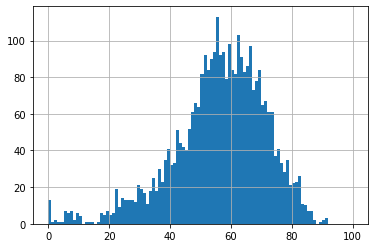

In [57]:
classification_df_with_popularity[classification_df_with_popularity.popularity > -1].popularity.hist(bins=range(0,101))
classification_df_with_popularity.popularity.quantile(0.85)

In [58]:
classification_df_with_popularity.corr()['popularity']


key                                                   0.005107
mode                                                 -0.052734
time_signature                                        0.097475
duration                                              0.014949
acousticness                                         -0.024420
danceability                                          0.173783
energy                                                0.020115
instrumentalness                                     -0.175949
liveness                                             -0.081200
loudness                                              0.209961
speechiness                                           0.043007
valence                                              -0.040682
tempo                                                 0.016019
explicit                                              0.220323
release_date                                         -0.261857
artist_followers                                      0

In [59]:
def plot_feature_and_target(dataframe_to_plot, feature, target):
  cols = [feature, target]
  dataframe_to_plot = dataframe_to_plot[cols]
  dataframe_to_plot.plot.scatter(x=feature, y=target)
  return

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


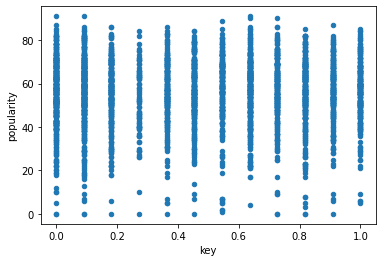

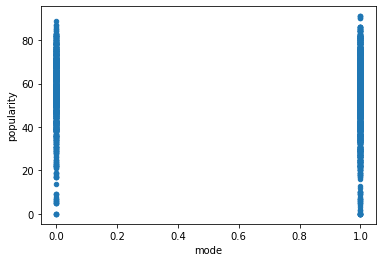

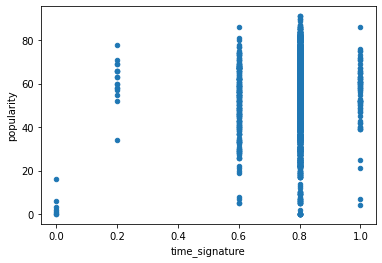

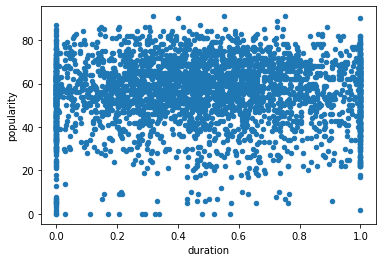

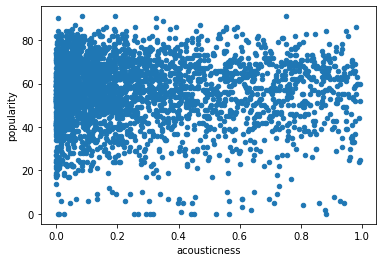

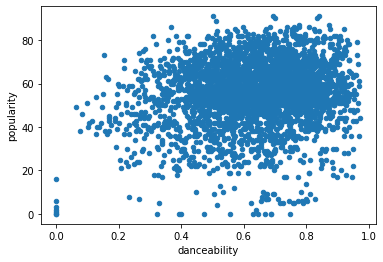

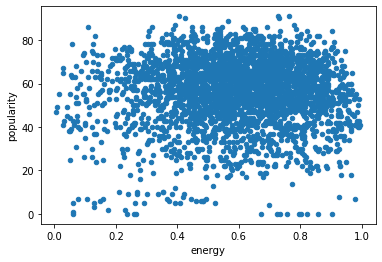

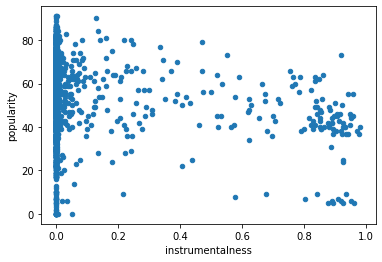

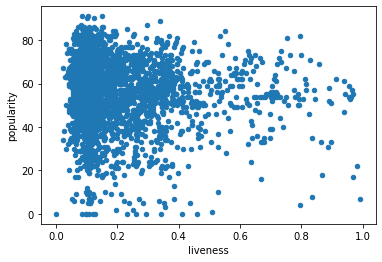

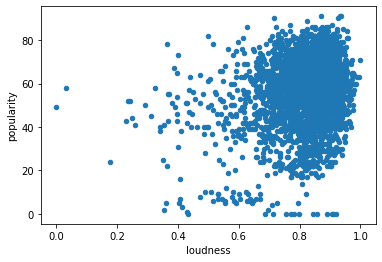

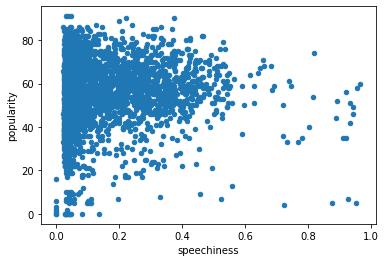

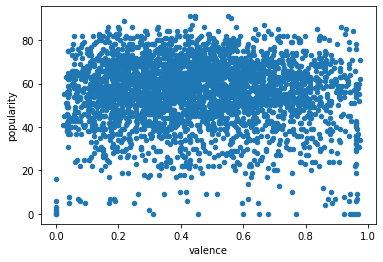

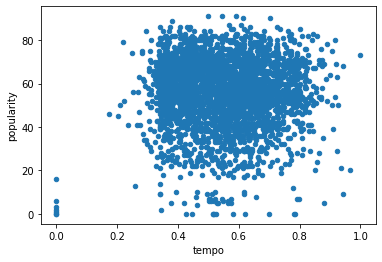

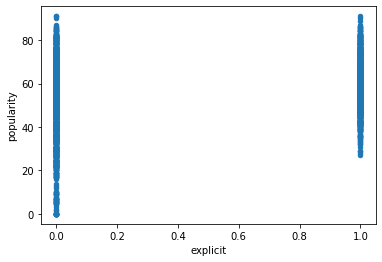

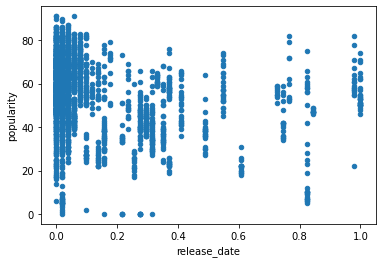

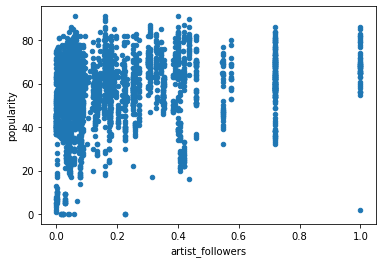

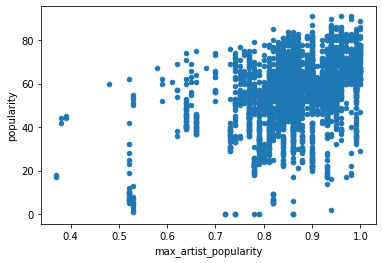

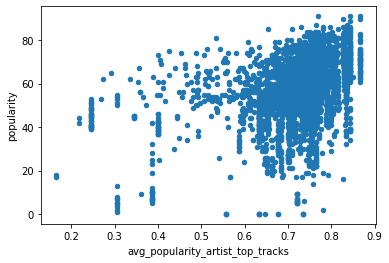

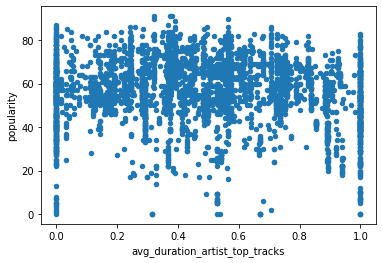

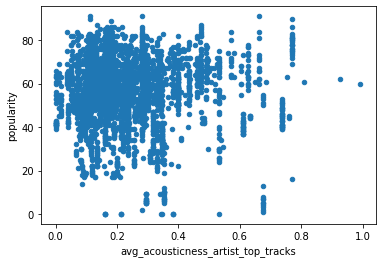

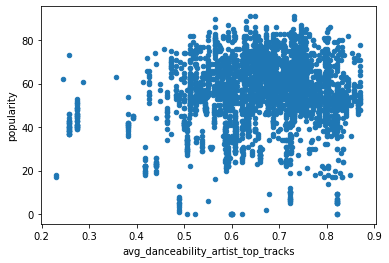

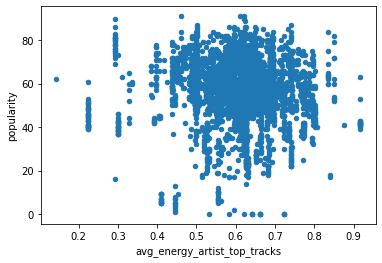

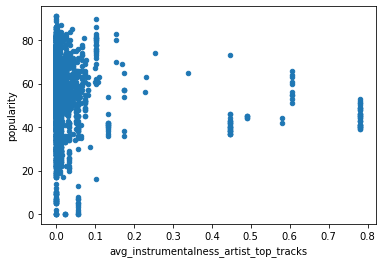

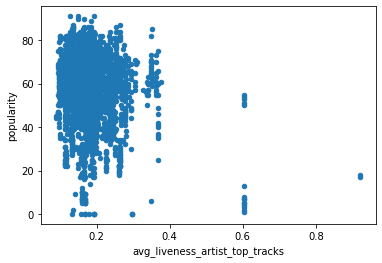

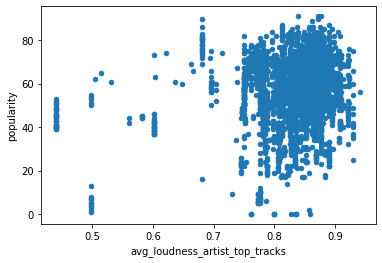

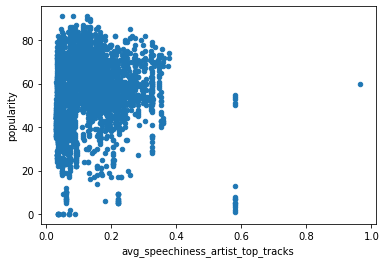

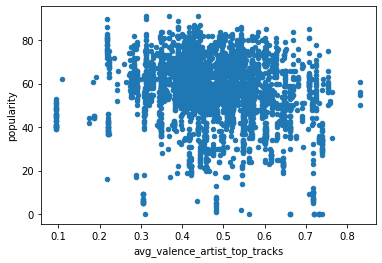

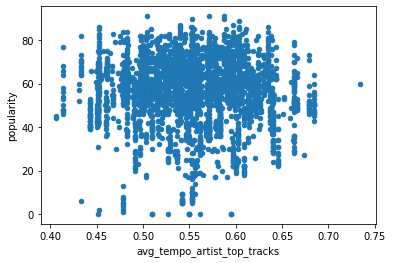

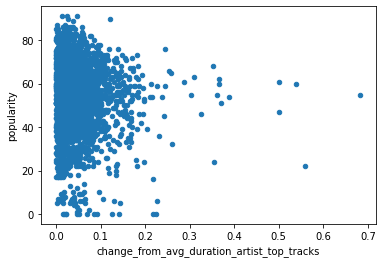

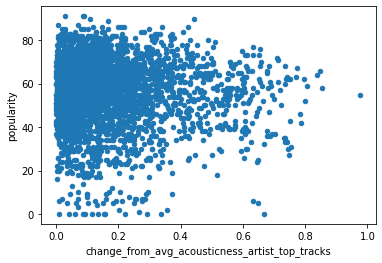

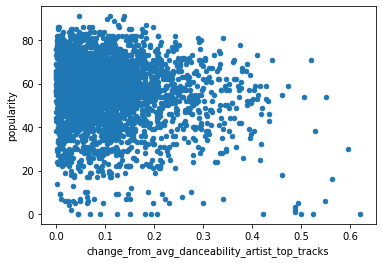

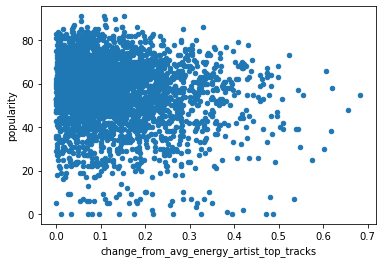

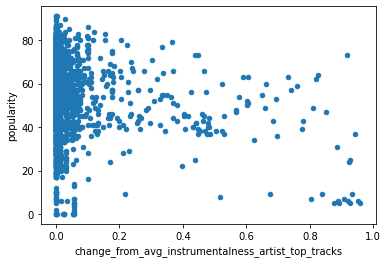

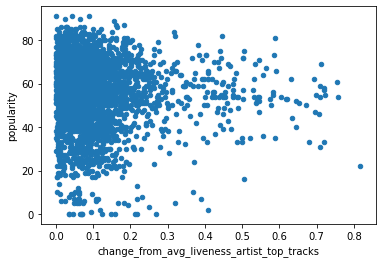

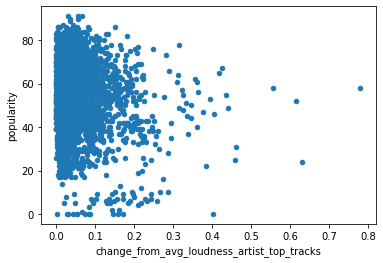

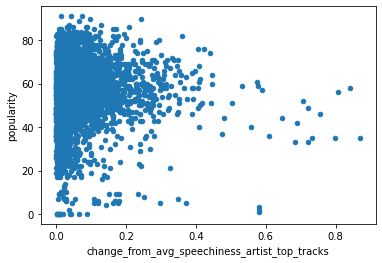

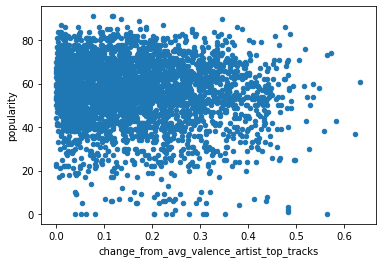

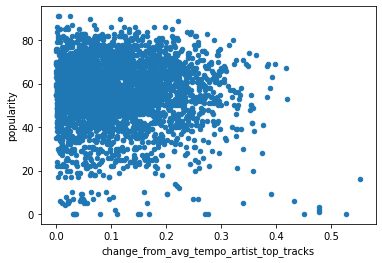

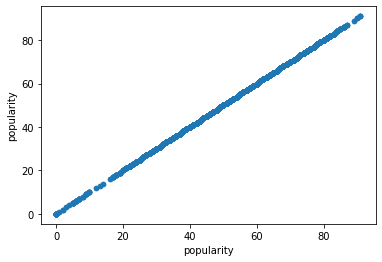

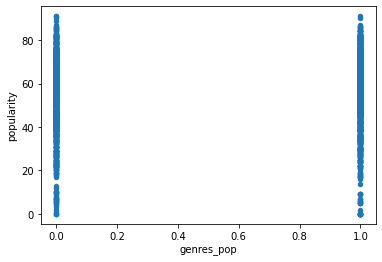

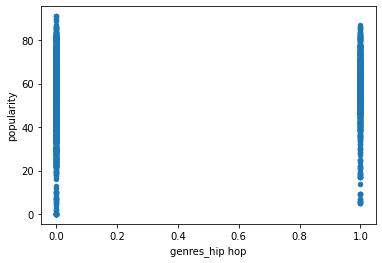

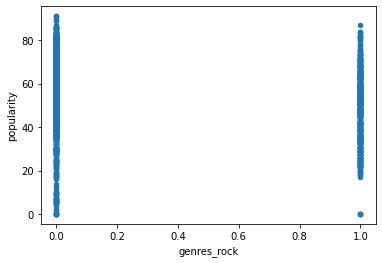

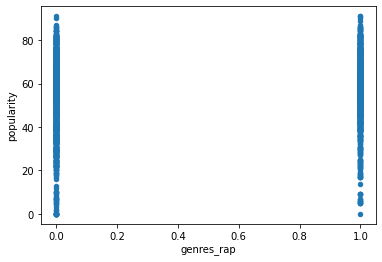

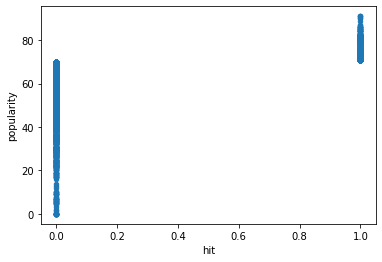

In [60]:
dataframe_to_plot = classification_df_with_popularity
target = 'popularity'

for col in dataframe_to_plot.columns:
  plot_feature_and_target(dataframe_to_plot, col, target)

## Creating Dataset

In [63]:
TRAIN_PCT = 0.7
VALID_PCT = 0.15

dataframe_to_use = classification_df
dataset_target = 'hit'
features = list(dataframe_to_use.columns.copy())
features.remove(dataset_target)

''' Scramble DataFrame '''
seed_torch(0)
dataframe_to_use = dataframe_to_use.sample(frac=1).reset_index(drop=True)

''' Split Data '''
num_data = dataframe_to_use.shape[0]

num_train = int(num_data * TRAIN_PCT)
num_val = int(num_data * VALID_PCT)
num_test = num_data - num_train - num_val

train_df = dataframe_to_use.iloc[0:num_train]
balanced_train_df = get_balanced_classification_df(train_df, hit_cutoff)
val_df = dataframe_to_use.iloc[num_train:num_train+num_val]
test_df = dataframe_to_use.iloc[num_train+num_val:num_data]

''' Create Datasets '''
train = SpotifyTracksDataset(train_df, features, dataset_target)
balanced_train = SpotifyTracksDataset(balanced_train_df, features, dataset_target)
val = SpotifyTracksDataset(val_df, features, dataset_target)
test = SpotifyTracksDataset(test_df, features, dataset_target)
full_dataset = SpotifyTracksDataset(dataframe_to_use, features, dataset_target)

## Models

In [ ]:
class CynthiaNetA(nn.Module):
  def __init__(self):
    super(CynthiaNetA, self).__init__()
    self.name = "CynthiaNetA"
    self.layers = nn.Sequential(
        nn.Linear(len(features), 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 20),
        nn.ReLU(),
        nn.Linear(20, 2)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    return x

In [40]:
class CynthiaNetB(nn.Module):
  def __init__(self):
    super(CynthiaNetB, self).__init__()
    self.name = "CynthiaNetB"
    self.layers = nn.Sequential(
        nn.Linear(len(features), 100),
        nn.Tanh(),
        nn.Linear(100, 50),
        nn.Tanh(),
        nn.Linear(50, 20),
        nn.Tanh(),
        nn.Linear(20, 2)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    return x

In [ ]:
class CynthiaNetC(nn.Module):
  def __init__(self):
    super(CynthiaNetC, self).__init__()
    self.name = "CynthiaNetC"
    self.layers = nn.Sequential(
        nn.Linear(len(features), 200),
        nn.Tanh(),
        nn.Linear(200, 100),
        nn.Tanh(),
        nn.Linear(100, 50),
        nn.Tanh(),
        nn.Linear(50, 20),
        nn.Tanh(),
        nn.Linear(20, 10),
        nn.Tanh(),
        nn.Linear(10, 2)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    return x

In [ ]:
class CynthiaNetD(nn.Module):
  def __init__(self):
    super(CynthiaNetD, self).__init__()
    self.name = "CynthiaNetD"
    self.layers = nn.Sequential(
        nn.Linear(len(features), 200),
        nn.ReLU(),
        nn.Linear(200, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 20),
        nn.ReLU(),
        nn.Linear(20, 2)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    return x

In [ ]:
len(features)

42

In [ ]:
class CynthiaNetE(nn.Module):
  def __init__(self):
    super(CynthiaNetE, self).__init__()
    self.name = "CynthiaNetE"
    self.layers = nn.Sequential(
        nn.Conv2d(len(features), 5, 2),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(5, 10, 2),
        nn.Linear(10*2*2, 32),
        nn.Linear(32, 2)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    x = x.view(-1, 10 * 2 * 2)
    x = x.squeeze(1)
    return x

## Training

### Helper Functions

In [41]:
def predict_some(model, data, num_to_predict):
  for i in range(0, num_to_predict):
    k = random.randint(0, len(data)-1)
    features, target = data[k]
    features = features.to(device)
    target = target.to(device)

    out = model(features.unsqueeze(0)).clamp(min=0,max=100)
    print(f"Actual: {round(target.item(), 2)};  Predicted: {round(out.item(), 2)}")

#--------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

def subsample_series(series, subsampling=1):
  '''
  Subsamples data series
  '''
  indices = np.arange(0,len(series),subsampling)
  subsampled_series = series[indices]
  return indices + 1, subsampled_series

def plot_data(data, multiple_series=False, subsampling=1, labels=None, title="", xlabel="", ylabel="", save_curve=False, file_name=None):
  plt.title(title)
  
  n = len(data)

  if multiple_series:
    for i, series in enumerate(data, 0):
      indices, subsampled_series = subsample_series(np.array(series), subsampling=subsampling)
      if labels:
        plt.plot(indices, subsampled_series, label=labels[i])
      else:
        plt.plot(indices, subsampled_series,)
  else:
    indices, subsampled_series = subsample_series(np.array(data), subsampling=subsampling)
    if labels:
        plt.plot( indices, subsampled_series, label=labels)
    else:
      plt.plot( indices, subsampled_series)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  if labels:
    plt.legend(loc='best')
  
  if save_curve and (file_name is not None):
    plt.savefig(file_name+'.png')
  plt.show()
#--------------------------------------------------------------------------------------------------------
def get_error_classification(model, data):
  model.eval()
  data_loader = torch.utils.data.DataLoader(data, batch_size=100)

  total_error = 0
  for features, targets in data_loader:
    features = features.to(device)
    targets = targets.to(device)

    targets = targets.squeeze(1).long()

    out = model(features)
    out = torch.softmax(out, dim=1)
    total_error += out.argmax(dim=1).eq(targets).sum().item()
  
  error_rate = 1 - (total_error/len(data))
  return error_rate

def get_stats_classification(model, data, criterion, bs=100):
  model.eval()
  data_loader = torch.utils.data.DataLoader(data, batch_size=bs)

  total_error = 0
  total_loss = 0
  for i, batch in enumerate(data_loader, 1):
    features, targets = batch
    features = features.to(device)
    targets = targets.to(device)

    targets = targets.squeeze(1).long()

    out = model(features)
    out = torch.softmax(out, dim=1)
    total_error += out.argmax(dim=1).eq(targets).sum().item()

    loss = criterion(out, targets)
    total_loss += loss.item()
  
  avg_loss = total_loss / i
  error_rate = 1 - (total_error/len(data))
  return error_rate, avg_loss
#--------------------------------------------------------------------------------------------------------
def get_model_name(name, bs, lr, wd, epoch):
  MODEL_INFO_PATH = "/content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/Models/"
  path = MODEL_INFO_PATH + f"model_{name}_bs{bs}_lr{lr}_wd{wd}_epoch{epoch}"
  return path

### Train Function

In [46]:
import copy

def train_net_classification(model, train_data, valid_data, bs=50, lr=0.01, wd=0, epochs=5, save_best=True, save_curves=True):
  model.train()
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
  #weights= [0.56, 0.44] #cyn
  #class_weights = torch.FloatTensor(weights) #cyn
  #criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

  train_losses, valid_losses, train_errors, val_errors = [], [], [], []
  model_checkpoints = {}

  for epoch in range(1, epochs + 1):
    epoch_error = 0
    epoch_loss = 0.0
    for i, batch in enumerate(train_loader, 1):
      features, targets = batch

      features = features.to(device)
      targets = targets.to(device)

      targets = targets.squeeze(1).long()
      
      optimizer.zero_grad()
      out = model(features)

      loss = criterion(out, targets)
      loss.backward()
      optimizer.step()

      out = torch.softmax(out, dim=1)

      epoch_loss += loss.item()
      epoch_error += out.argmax(dim=1).eq(targets).sum().item()

    epoch_loss = epoch_loss / i
    train_error_rate = 1 - (epoch_error / len(train_data))
    val_error_rate, val_loss = get_stats_classification(model, valid_data, criterion, bs=bs)
    model.train()
    
    train_losses.append(epoch_loss)
    valid_losses.append(val_loss)
    train_errors.append(train_error_rate)
    val_errors.append(val_error_rate)
    
    model_checkpoints[epoch] = copy.deepcopy(model.state_dict())
    
    print(f"Epoch {epoch}")
    print(f"  Train Error: {train_error_rate}")
    print(f"  Valid Error: {val_error_rate}")
    print(f"  Train Loss: {epoch_loss}")
    print(f"  Valid Loss: {val_loss}")
    print("\n")

  if save_best:
    best_epoch = torch.tensor(valid_losses).argmin().item() + 1
    model_path = get_model_name(model.name, bs, lr, wd, best_epoch) + f"_error{round(val_errors[best_epoch-1]*100, 2)}"
    torch.save(model_checkpoints[best_epoch], model_path)    

  plot_data([train_losses, valid_losses], multiple_series=True, labels=["Train", "Validation"],
            title="Avg Batch Loss in Epoch", xlabel='Epoch', ylabel='Loss', save_curve=save_curves, file_name=model_path+'_losses')
  plot_data([train_errors, val_errors], multiple_series=True, labels=["Train", "Validation"], 
            title="Error by Epoch", xlabel='Epoch', ylabel='Error Rate', save_curve=save_curves, file_name=model_path+'_errors')

### Training Model

#### Successful Model

Streaming output truncated to the last 5000 lines.

Epoch 287
  Train Error: 0.1069237510955302
  Valid Error: 0.13496932515337423
  Train Loss: 0.2594841602775786
  Valid Loss: 0.4675736203789711


Epoch 288
  Train Error: 0.10035056967572309
  Valid Error: 0.14110429447852757
  Train Loss: 0.25952908479505116
  Valid Loss: 0.46480555087327957


Epoch 289
  Train Error: 0.10429447852760731
  Valid Error: 0.13292433537832316
  Train Loss: 0.25537197705772186
  Valid Loss: 0.46820078790187836


Epoch 290
  Train Error: 0.09640666082383875
  Valid Error: 0.13292433537832316
  Train Loss: 0.27072470800744164
  Valid Loss: 0.46444256603717804


Epoch 291
  Train Error: 0.10122699386503065
  Valid Error: 0.15541922290388543
  Train Loss: 0.2574080295032925
  Valid Loss: 0.4788854345679283


Epoch 292
  Train Error: 0.09333917616126208
  Valid Error: 0.1492842535787321
  Train Loss: 0.2572650983929634
  Valid Loss: 0.4717565104365349


Epoch 293
  Train Error: 0.09859772129710775
  Valid Err

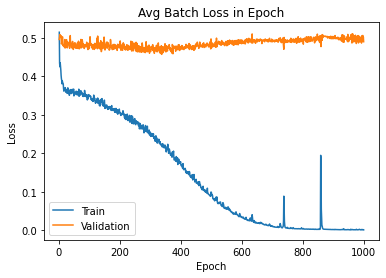

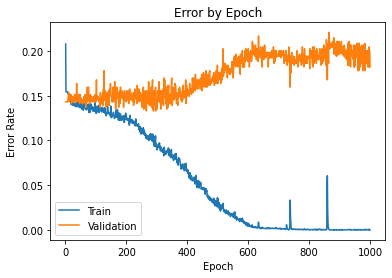

In [64]:
model = CynthiaNetB()
model.to(device)

train_net_classification(model, train, val, bs=132, lr=1e-3, wd=0, epochs=1000, save_best=True)

#### Playground

Streaming output truncated to the last 5000 lines.

Epoch 1287
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.0002482588643033523
  Valid Loss: 0.48003673553466797


Epoch 1288
  Train Error: 0.0
  Valid Error: 0.17177914110429449
  Train Loss: 0.0002382695092819631
  Valid Loss: 0.48058152198791504


Epoch 1289
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.0002360733460591291
  Valid Loss: 0.48048533499240875


Epoch 1290
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.0002569518401287496
  Valid Loss: 0.4804421663284302


Epoch 1291
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.00027338883955962956
  Valid Loss: 0.48028355836868286


Epoch 1292
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.00024901970755308867
  Valid Loss: 0.48131532967090607


Epoch 1293
  Train Error: 0.0
  Valid Error: 0.17382413087934556
  Train Loss: 0.00026656184854800813
  Valid Loss: 0.4811675

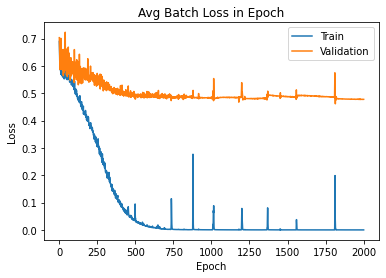

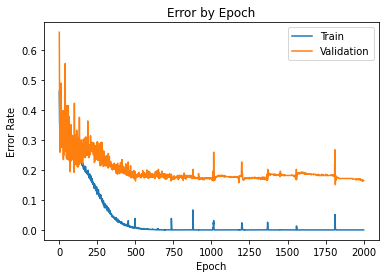

In [ ]:
model = ClassificationNetA()
model.to(device)

train_net_classification(model, balanced_train, val, bs=256, lr=0.001, wd=0, epochs=2000, save_best=True)

## Evaluation

### Load Model

In [48]:
# model_name = get_model_name('ClassificationNetA', 16, 0.00025, 0, 948) + '_error18.61'
MODEL_INFO_PATH = "/content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/Models/"
model_name = "model_CynthiaNetB_bs132_lr0.001_wd0_epoch804_error16.76"
loaded_model = CynthiaNetB()
state = torch.load(MODEL_INFO_PATH + model_name)
loaded_model.load_state_dict(state)
if torch.cuda.is_available():
  loaded_model.cuda()
loaded_model.eval()

CynthiaNetB(
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): Tanh()
    (4): Linear(in_features=50, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [65]:
# model_name = get_model_name('ClassificationNetA', 16, 0.00025, 0, 948) + '_error18.61'
MODEL_INFO_PATH = "/content/drive/My Drive/Colab Notebooks/Project/Hit-Song-Prediction/Models/"
model_name = "model_CynthiaNetB_bs132_lr0.001_wd0_epoch337_error13.7"
loaded_model = CynthiaNetB()
state = torch.load(MODEL_INFO_PATH + model_name)
loaded_model.load_state_dict(state)
if torch.cuda.is_available():
  loaded_model.cuda()
loaded_model.eval()

CynthiaNetB(
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): Tanh()
    (4): Linear(in_features=50, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=2, bias=True)
  )
)

### Helper Functions

In [49]:
def get_baseline_classification_error(df):
  total_error = 0
  correct = (df.hit == (df.avg_popularity_artist_top_tracks*100 > hit_cutoff)).sum()
  # correct = (df.hit == (df.max_artist_popularity*100 > hit_cutoff)).sum()
  error_rate = 1 - (correct/df.shape[0])
  return error_rate

#--------------------------------------------------------------------------------------------------------
def get_confusion_matrix(model, data):
  model.eval()
  data_loader = torch.utils.data.DataLoader(data, batch_size=100)

  matrix = np.zeros(shape=(2,2))

  total_error = 0
  for features, targets in data_loader:
    features = features.to(device)
    targets = targets.to(device)

    targets = targets.squeeze(1).long()

    out = model(features)
    out = torch.softmax(out, dim=1)

    # Non-hit Correct
    matrix[0,0] += ((out.argmax(dim=1) == 0) * (targets == 0)).sum().item()
    # Hit Correct
    matrix[1,1] += ((out.argmax(dim=1) == 1) * (targets == 1)).sum().item()
    # Hit Incorrect (False Negative)
    matrix[0,1] += ((out.argmax(dim=1) == 0) * (targets == 1)).sum().item()
    # Non-Hit Incorrect (False Positive)
    matrix[1,0] += ((out.argmax(dim=1) == 1) * (targets == 0)).sum().item()
  
  return matrix

def get_baseline_confusion(df):
  total_error = 0
  matrix = np.zeros(shape=(2,2))

  # Non-hit Correct
  matrix[0,0] += ((df.avg_popularity_artist_top_tracks*100 <= 70) & (df.hit == 0)).sum().item()
  # Hit Correct
  matrix[1,1] += ((df.avg_popularity_artist_top_tracks*100 > 70) & (df.hit == 1)).sum().item()
  # Hit Incorrect (False Negative)
  matrix[0,1] += ((df.avg_popularity_artist_top_tracks*100 <= 70) & (df.hit == 1)).sum().item()
  # Non-Hit Incorrect (False Positive)
  matrix[1,0] += ((df.avg_popularity_artist_top_tracks*100 > 70) & (df.hit == 0)).sum().item()

  return matrix

def print_confusion_matrix(matrix):
  print(f"--------------------------------------")
  print(f"                   Actual")
  print(f"                  0      1")
  print(f"Predicted  0    {round(matrix[0,0]*100,2)}   {round(matrix[0,1]*100,2)}")
  print(f"           1    {round(matrix[1,0]*100,2)}   {round(matrix[1,1]*100,2)}")
  print(f"--------------------------------------")

### Model Accuracy

In [66]:
# error = get_error_classification(loaded_model, balanced_train)
# print(f"Balanced Training Error: {round(error*100,2)}%")

error = get_error_classification(loaded_model, train)
print(f"Training Error: {round(error*100,2)}%")

error = get_error_classification(loaded_model, val)
print(f"Validation Error: {round(error*100,2)}%")

error = get_error_classification(loaded_model, test)
print(f"Testing Error: {round(error*100,2)}%")

error = get_error_classification(loaded_model, full_dataset)
print(f"Full Dataset Error: {round(error*100,2)}%")

Training Error: 9.9%
Validation Error: 13.7%
Testing Error: 15.71%
Full Dataset Error: 11.35%


In [67]:
# print(f"\nBalanced Training Matrix:")
# matrix = get_confusion_matrix(loaded_model, balanced_train) / len(balanced_train)
# print_confusion_matrix(matrix)


print(f"\nTraining Matrix:")
matrix = get_confusion_matrix(loaded_model, train) / len(train)
print_confusion_matrix(matrix)


print(f"\nValidation Matrix:")
matrix = get_confusion_matrix(loaded_model, val) / len(val)
print_confusion_matrix(matrix)


print(f"\nTesting Matrix:")
matrix = get_confusion_matrix(loaded_model, test) / len(test)
print_confusion_matrix(matrix)


print(f"\nFull Dataset Matrix:")
matrix = get_confusion_matrix(loaded_model, full_dataset) / len(full_dataset)
print_confusion_matrix(matrix)


Training Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    83.48   8.81
           1    1.1   6.62
--------------------------------------

Validation Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    83.84   11.86
           1    1.84   2.45
--------------------------------------

Testing Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    82.04   13.27
           1    2.45   2.24
--------------------------------------

Full Dataset Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    83.32   9.94
           1    1.41   5.34
--------------------------------------


### Baseline Model Accuracy

In [ ]:
baseline_error = get_baseline_classification_error(balanced_train_df)
print(f"Balanced Training Baseline Error: {round(baseline_error*100,2)}%")

baseline_error = get_baseline_classification_error(train_df)
print(f"Training Baseline Error: {round(baseline_error*100,2)}%")

baseline_error = get_baseline_classification_error(val_df)
print(f"Validation Baseline Error: {round(baseline_error*100,2)}%")

baseline_error = get_baseline_classification_error(test_df)
print(f"Testing Baseline Error: {round(baseline_error*100,2)}%")

baseline_error = get_baseline_classification_error(pd.concat([train_df, val_df, test_df], axis=0))
print(f"Full Dataset Baseline Error: {round(baseline_error*100,2)}%")


Balanced Training Baseline Error: 38.6%
Training Baseline Error: 57.67%
Validation Baseline Error: 58.28%
Testing Baseline Error: 58.57%
Full Dataset Baseline Error: 57.9%


In [ ]:
print(f"\nBalanced Training Matrix:")
matrix = get_baseline_confusion(balanced_train_df) / balanced_train_df.shape[0]
print_confusion_matrix(matrix)


print(f"\nTraining Matrix:")
matrix = get_baseline_confusion(train_df) / train_df.shape[0]
print_confusion_matrix(matrix)


print(f"\nValidation Matrix:")
matrix = get_baseline_confusion(val_df) / val_df.shape[0]
print_confusion_matrix(matrix)


print(f"\Testing Matrix:")
matrix = get_baseline_confusion(test_df) / test_df.shape[0]
print_confusion_matrix(matrix)


print(f"\nFull Dataset Matrix:")
matrix = get_baseline_confusion(pd.concat([train_df, val_df, test_df], axis=0)) / (train_df.shape[0] + val_df.shape[0] + test_df.shape[0])
print_confusion_matrix(matrix)


Balanced Training Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    16.92   5.52
           1    33.08   44.48
--------------------------------------

Training Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    28.62   1.71
           1    55.96   13.72
--------------------------------------

Validation Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    29.24   1.84
           1    56.44   12.47
--------------------------------------
\Testing Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    27.76   1.84
           1    56.73   13.67
--------------------------------------

Full Dataset Matrix:
--------------------------------------
                   Actual
                  0      1
Predicted  0    28.58   1.75
           1   

# Regression Stuff

### Model

In [ ]:
class RegressionNet(nn.Module):
  def __init__(self):
    super(RegressionNet, self).__init__()
    
    self.layers = nn.Sequential(
        nn.Linear(len(features), 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,1)
    ).to(device)


  def forward(self, x):
    x = self.layers(x)
    return x

### Training

In [ ]:
def get_error_regression(model, data):
  model.eval()
  data_loader = torch.utils.data.DataLoader(data, batch_size=100)
  total_error = 0
  for features, targets in data_loader:
    features = features.to(device)
    targets = targets.to(device)

    out = model(features)
    total_error += (targets - out.clamp(min=0,max=100)).abs().sum().item()
  
  error_rate = total_error/len(data)
  return error_rate

def get_stats_regression(model, data, criterion, bs=100):
  model.eval()
  data_loader = torch.utils.data.DataLoader(data, batch_size=bs)

  total_error = 0.0
  total_loss = 0.0
  for i, batch in enumerate(data_loader, 1):
    features, targets = batch
    features = features.to(device)
    targets = targets.to(device)

    out = model(features)
    total_error += (targets - out.clamp(min=0,max=100)).abs().sum().item()

    loss = criterion(out, targets)
    total_loss += loss.item()
  
  avg_loss = total_loss / i
  error = total_error/len(data)
  return error, avg_loss

In [ ]:
def train_net_regression(model, train_data, valid_data, bs=50, lr=0.01, wd=0, epochs=5):
  model.train()
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)

  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

  train_losses, valid_losses, train_errors, val_errors = [], [], [], []

  for epoch in range(1, epochs + 1):
    epoch_error = 0.0
    epoch_loss = 0.0
    for i, batch in enumerate(train_loader, 1):
      features, targets = batch

      features = features.to(device)
      targets = targets.to(device)
      
      optimizer.zero_grad()
      out = model(features)

      loss = criterion(out, targets)
      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()
      epoch_error += (targets - out.clamp(min=0,max=100)).abs().sum().item()

    epoch_loss = epoch_loss / i
    train_error_rate = epoch_error / len(train_data)
    val_error_rate, val_loss = get_stats_regression(model, valid_data, criterion, bs=bs)
    model.train()

    train_losses.append(epoch_loss)
    valid_losses.append(val_loss)
    train_errors.append(train_error_rate)
    val_errors.append(val_error_rate)
    
    
    print(f"Epoch {epoch}")
    print(f"  Train Error: {train_error_rate}")
    print(f"  Valid Error: {val_error_rate}")
    print(f"  Train Loss: {epoch_loss}")
    print(f"  Valid Loss: {val_loss}")
    print()
    predict_some(model, train_data, 2)
    print()
    predict_some(model, valid_data, 2)
    print("\n")

  plot_data([train_losses, valid_losses], multiple_series=True, labels=["Train", "Validation"],
            title="Avg Batch Loss in Epoch", xlabel='Epoch', ylabel='Loss')
  plot_data([train_errors, val_errors], multiple_series=True, labels=["Train", "Validation"], 
            title="Avg Error by Epoch", xlabel='Epoch', ylabel='Avg Error')

In [ ]:
model = RegressionNet()
model.to(device)

train_net_regression(model, train, val, bs=512, lr=0.0001, wd=0, epochs=1000)

NameError: ignored

### Evaluation


In [ ]:
def get_baseline_regression_error(df):
  total_error = 0
  errors = (df.max_artist_popularity*100 - df.popularity).abs()
  errors = (df.avg_popularity_artist_top_tracks*100 - df.popularity).abs()
  total_error = errors.sum()
  error_rate = total_error/df.shape[0]
  return error_rate

In [ ]:
error = get_error_regression(model, test)
print(error)
error = get_error_regression(model, full_dataset)
print(error)

1.3287614371559837
1.3246404070379347


In [ ]:
baseline_error = get_baseline_regression_error(train_df)
print(baseline_error)
baseline_error = get_baseline_regression_error(val_df)
print(baseline_error)
baseline_error = get_baseline_regression_error(test_df)
print(baseline_error)

baseline_error = get_baseline_regression_error(regression_df)
print(baseline_error)

19.919915253461415
20.68003212275486
20.30826438249911
20.092127926842924
